# Drive and Instat Visualization

In [26]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
json_files = ['/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700002NCAHOPUN240930SK.json', 
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700003NCAHOPUN241002SK.json', 
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700005NCAHOPUN241008SK.json', 
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700006NCAHOCUN241008SK.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700008NCAHOPUN241015SK.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700009NCAHOPUN241022SK.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700010NCAUSGHO241026MC.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700011NCAHOPUN241204HA.json']

# Create a dictionary to store DataFrames
dataframes = {}

# Read each JSON file and create a DataFrame
for json_file in json_files:
    if os.path.exists(json_file):
        with open(json_file, 'r') as file:
            data = json.load(file)
            drive = pd.DataFrame(data)
           # dataframes[json_file] = drive
    else:
        print(f"File not found: {json_file}")

# Print the DataFrames
for file_name, drive in dataframes.items():
    print(f"DataFrame for {file_name}:")


In [28]:
drive.head()

,tagId,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,...,lean,skatingEdge,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi
0,0012,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,...,1.564215,linear,1.011,True,False,0.759662,1,entered,0,0.1
1,0012,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,...,1.564257,linear,1.011,False,False,0.759662,1,entered,0,0.2
2,0012,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,...,1.564299,linear,1.011,False,False,0.759662,1,entered,0,0.3
3,0012,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,...,1.564343,linear,1.011,False,False,0.759662,1,entered,0,0.4
4,0012,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,...,1.564388,linear,1.011,False,False,0.759662,1,entered,0,0.5


<class 'pandas.core.frame.DataFrame'>
Index: 1092670 entries, 0 to 1092669
Data columns (total 39 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   tagId             1092670 non-null  object 
 1   timestamp         1092670 non-null  int64  
 2   x                 1092670 non-null  float64
 3   y                 1092670 non-null  float64
 4   vx                1092670 non-null  float64
 5   vy                1092670 non-null  float64
 6   q                 1092670 non-null  int64  
 7   superframe        1092670 non-null  int64  
 8   speed             1092670 non-null  float64
 9   acceleration      1092670 non-null  float64
 10  ax                1092670 non-null  float64
 11  ay                1092670 non-null  float64
 12  totalDistance     1092670 non-null  float64
 13  displacement      1092670 non-null  float64
 14  playerId          1092670 non-null  object 
 15  gameStatus        1092670 non-null  object 
 16  skati

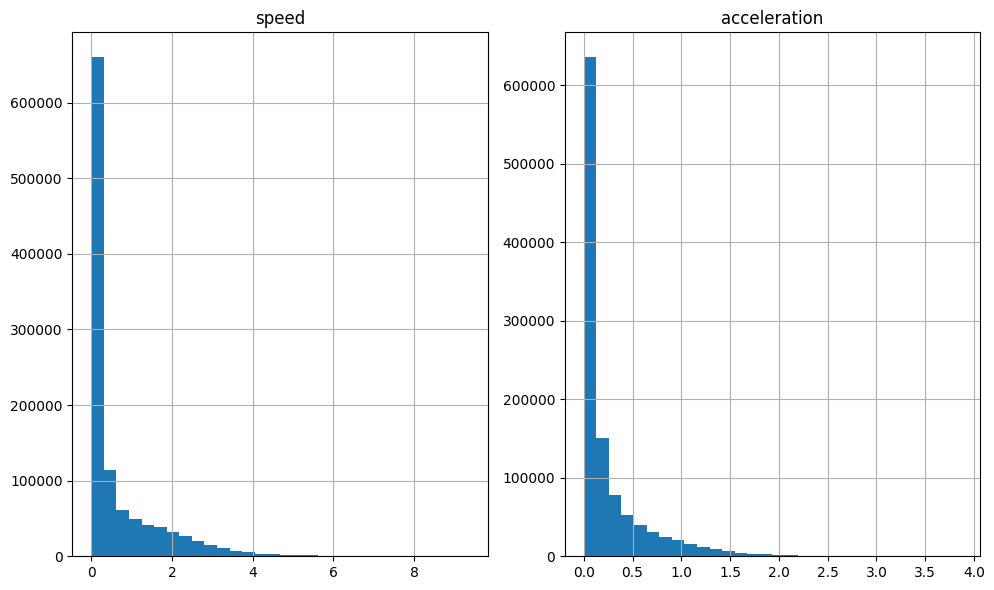

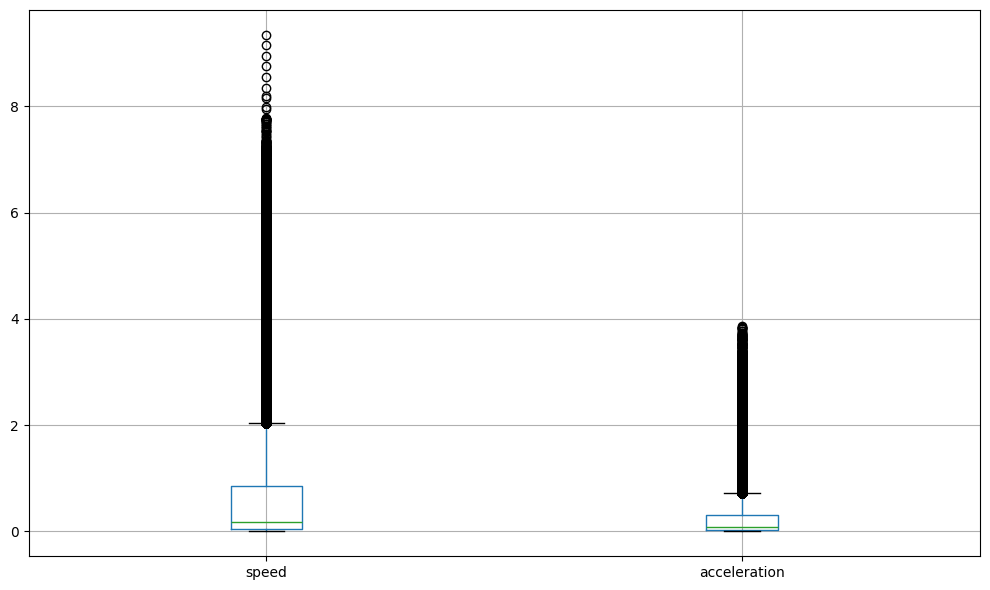


Data Types:
 tagId                object
timestamp             int64
x                   float64
y                   float64
vx                  float64
vy                  float64
q                     int64
superframe            int64
speed               float64
acceleration        float64
ax                  float64
ay                  float64
totalDistance       float64
displacement        float64
playerId             object
gameStatus           object
skatingAngle        float64
speedUp                bool
zone                 object
playingPosition      object
speedDown_end          bool
speedUp_start          bool
team                 object
gap                    bool
curvature           float64
radius_curvature    float64
a_tot               float64
a_centripetal       float64
g_force             float64
lean                float64
skatingEdge          object
g_force_avg         float64
g_force_peak           bool
deaccel                bool
sustained_speed     float64
anomal

In [29]:
# Examine Data Structure
print(drive.info())
print(f"Number of rows: {drive.shape[0]}, Number of columns: {drive.shape[1]}")

# Identify Missing Values
print("\nMissing Values per Column:\n", drive.isnull().sum())

# Check for Inconsistencies and Outliers (Descriptive Statistics and Visualization)
performance_metrics = ['goals', 'assists', 'shots', 'ice time', 'speed', 'acceleration']
# Filter for numerical columns in performance_metrics and check if they exist in dataframe
numerical_performance_metrics = [col for col in performance_metrics if col in drive.columns and pd.api.types.is_numeric_dtype(drive[col])]

if numerical_performance_metrics:
    print("\nDescriptive Statistics for Performance Metrics:\n", drive[numerical_performance_metrics].describe())
    import matplotlib.pyplot as plt
    drive[numerical_performance_metrics].hist(figsize=(10, 6), bins=30)
    plt.tight_layout()
    plt.show()
    drive.boxplot(column=numerical_performance_metrics, figsize=(10, 6))
    plt.tight_layout()
    plt.show()
else:
    print("\nNo numerical performance metrics found or all the performance metrics are not numerical.")


# Data Type Analysis
print("\nData Types:\n", drive.dtypes)

In [30]:
# Impute missing 'sustained_speed' with the median
if 'sustained_speed' in drive.columns:
    drive['sustained_speed'].fillna(0, inplace=True)

# Address inconsistencies: Remove rows with non-numeric values in 'speed' and 'acceleration'
for col in ['speed', 'acceleration']:
    if col in drive.columns:
        drive = drive[pd.to_numeric(drive[col], errors='coerce').notnull()]
        drive[col] = pd.to_numeric(drive[col])

display(drive.head())
display(drive.info())

/var/folders/fn/1h19dxrs6m105yhjv2k86ryr0000gn/T/ipykernel_4019/1018819049.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drive['sustained_speed'].fillna(0, inplace=True)


,tagId,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,...,lean,skatingEdge,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi
0,0012,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,...,1.564215,linear,1.011,True,False,0.759662,1,entered,0,0.1
1,0012,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,...,1.564257,linear,1.011,False,False,0.759662,1,entered,0,0.2
2,0012,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,...,1.564299,linear,1.011,False,False,0.759662,1,entered,0,0.3
3,0012,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,...,1.564343,linear,1.011,False,False,0.759662,1,entered,0,0.4
4,0012,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,...,1.564388,linear,1.011,False,False,0.759662,1,entered,0,0.5


<class 'pandas.core.frame.DataFrame'>
Index: 1092670 entries, 0 to 1092669
Data columns (total 39 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   tagId             1092670 non-null  object 
 1   timestamp         1092670 non-null  int64  
 2   x                 1092670 non-null  float64
 3   y                 1092670 non-null  float64
 4   vx                1092670 non-null  float64
 5   vy                1092670 non-null  float64
 6   q                 1092670 non-null  int64  
 7   superframe        1092670 non-null  int64  
 8   speed             1092670 non-null  float64
 9   acceleration      1092670 non-null  float64
 10  ax                1092670 non-null  float64
 11  ay                1092670 non-null  float64
 12  totalDistance     1092670 non-null  float64
 13  displacement      1092670 non-null  float64
 14  playerId          1092670 non-null  object 
 15  gameStatus        1092670 non-null  object 
 16  skati

None

In [31]:
# Check data types
print(drive.dtypes)

# Convert columns to numerical types, handling errors
columns_to_convert = ['speed', 'acceleration', 'ax', 'ay', 'totalDistance', 'displacement', 'skatingAngle', 'speedUp', 'endurance', 'endurance_on', 'speedDown_end', 'speedUp_start', 'gap', 'curvature', 'radius_curvature', 'a_tot', 'a_centripetal', 'g_force', 'g_force_avg', 'g_force_peak', 'sustained_speed', 'toi', 'playerShiftNum']
for col in columns_to_convert:
    if col in drive.columns:
        drive[col] = pd.to_numeric(drive[col], errors='coerce')

# Print info to confirm data types
print(drive.info())

tagId                object
timestamp             int64
x                   float64
y                   float64
vx                  float64
vy                  float64
q                     int64
superframe            int64
speed               float64
acceleration        float64
ax                  float64
ay                  float64
totalDistance       float64
displacement        float64
playerId             object
gameStatus           object
skatingAngle        float64
speedUp                bool
zone                 object
playingPosition      object
speedDown_end          bool
speedUp_start          bool
team                 object
gap                    bool
curvature           float64
radius_curvature    float64
a_tot               float64
a_centripetal       float64
g_force             float64
lean                float64
skatingEdge          object
g_force_avg         float64
g_force_peak           bool
deaccel                bool
sustained_speed     float64
anomaly             

In [32]:
# Define the path to the Excel file
games_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/games_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_games = pd.read_excel(games_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_games.head())

,Date,Opponent,Penalties,Penalties drawn,Penalty time,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Faceoffs in DZ,...,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Shots,Shots on goal,Blocked shots,Type,Hood Score,Opponent Score
0,08/02,vs Stevenson Mustangs,2,4,04:00,51,26,51%,1,16,...,53%,18,11,61%,46,31,7,GamesTotal,4,7
1,23/01,vs Neumann Knights,5,3,10:00,55,28,51%,0,17,...,70%,28,17,61%,82,34,29,GamesTotal,1,0
2,24/01,vs Neumann Knights,5,3,10:00,58,25,43%,0,26,...,54%,19,8,42%,58,25,24,GamesTotal,3,4
3,31/01,vs Lebanon Valley Flying Dutchmen,6,2,12:00,54,19,35%,1,30,...,60%,9,4,44%,41,19,10,GamesTotal,2,6
4,07/01,vs King's Monarchs,4,3,08:00,41,20,49%,1,15,...,58%,14,7,50%,34,11,12,GamesTotal,1,4


In [33]:
# Define the path to the Excel file
goalies_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/goalies_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_goalies = pd.read_excel(goalies_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_goalies.head())

,Shirt number,Player,Games played,Time on ice,Goals against,Shots on goal,Saves,"Saves, %",Penalty time,Penalties drawn,...,Shootouts allowed,Shootouts,Scoring chances - total,Scoring chance saves,"Scoring chance saves, %",Type,Time on ice (mins),Time on ice (secs),Penalty time (mins),Penalty time (secs)
0,9,Maggie Grijalva,8,51:12,2.40,35.0,32.0,93.0,0,0,...,0.00,0.00,22.0,16.0,72.0,GamesTotal,51,12,0,0
1,35,Hayley Turnbull,7,49:08,3.70,35.0,31.0,89.0,00:17,0,...,0.14,0.43,28.0,19.0,68.0,GamesTotal,49,8,0,17
2,22,Kamryn Sohner,6,49:22,2.80,38.0,35.0,93.0,0,0,...,0.00,0.00,28.0,18.0,63.0,GamesTotal,49,22,0,0
3,44,Emily Warren,2,16:44,2.50,13.0,10.0,80.0,0,0,...,0.00,0.00,8.0,5.0,63.0,GamesTotal,16,44,0,0
4,9,Maggie Grijalva,8,40:25,1.75,25.0,23.0,93.0,0,0,...,0.00,0.00,16.0,11.0,73.0,EV,40,25,0,0


In [34]:
# Define the path to the Excel file
skaters_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/skaters_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_skaters = pd.read_excel(skaters_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_skaters.head())

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,"Faceoffs won in DZ, %",Faceoffs in NZ,Faceoffs won in NZ,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Type,Time on ice (mins),Time on ice (secs)
0,6,Alyssa Wilson,F,18:39,18,22.0,0.00,0.00,0.06,0.06,...,100.0,0.06,0.00,NaN,0.00,0.00,NaN,GamesTotal,18,39
1,12,Ella Bynan,F,17:01,18,20.0,0.00,0.17,0.11,0.28,...,48.0,2.90,1.17,40.0,4.20,2.20,51.0,GamesTotal,17,1
2,88,Reece Gall,F,14:29,18,17.0,0.17,0.00,0.00,0.00,...,34.0,1.50,0.56,37.0,1.00,0.61,61.0,GamesTotal,14,29
3,42,Averi Reider,F,08:19,17,10.0,0.00,0.06,0.00,0.06,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,GamesTotal,8,19
4,91,Olivia Sharkoski,F,12:05,18,17.0,0.11,0.00,0.00,0.00,...,38.0,0.78,0.28,36.0,0.89,0.39,44.0,GamesTotal,12,5


In [35]:
# Define the path to the Excel file
lines_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/lines_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_lines= pd.read_excel(lines_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_lines.head())

,Line,Plus/Minus,Numbers of shifts,Time on ice,Goals,Opponent's goals,Shots,Shots on goal,Opponent shots total,Shots on goal against,...,Short-handed play,Power-play played,Power play time,Successful power play,Short-handed time,Type,Time on ice (mins),Time on ice (secs),Power play time (mins),Power play time (secs)
0,"8 A. Bazylewicz, 18 A. Wilbur, 77 M. Cheesebro...",0.0,5.0,03:17,0.0,0.0,2.0,0.5,0.5,0.0,...,0.00,4.50,03:17,0.0,0,Basic,3,17,3,17
1,"15 D. Ormiston, 6 A. Wilson, 5 C. Kittell, 12 ...",-0.5,4.5,02:54,0.0,0.5,1.5,1.5,5.0,3.5,...,0.00,0.00,0,0.0,0,Basic,2,54,0,0
2,"15 D. Ormiston, 4 K. MacKinnon, 91 O. Sharkosk...",0.0,5.0,02:53,0.0,0.0,0.0,0.0,5.0,3.0,...,0.00,0.00,0,0.0,0,Basic,2,53,0,0
3,"15 D. Ormiston, 6 A. Wilson, 5 C. Kittell, 91 ...",0.0,19.0,02:53,0.0,0.0,4.0,2.7,5.0,3.3,...,0.33,0.33,00:04,0.0,0,Basic,2,53,0,4
4,"4 K. MacKinnon, 18 A. Wilbur, 6 A. Wilson, 12 ...",0.0,6.0,02:52,0.0,0.0,0.0,0.0,3.0,1.0,...,0.00,0.00,0,0.0,0,Basic,2,52,0,0


In [36]:
print(instat_skaters.columns)

Index(['Shirt number', 'Player', 'Position', 'Time on ice', 'Games played',
       'All shifts', 'Goals', 'First assist', 'Second assist', 'Assists',
       'Points', '+/-', 'Scoring chances', 'Penalties drawn', 'Penalty time',
       'Faceoffs', 'Faceoffs won', 'Faceoffs won, %', 'Hits', 'Shots',
       'Shots on goal', 'Blocked shots', 'Power play shots',
       'Short-handed shots', 'Passes to the slot', 'Faceoffs in DZ',
       'Faceoffs won in DZ', 'Faceoffs won in DZ, %', 'Faceoffs in NZ',
       'Faceoffs won in NZ', 'Faceoffs won in NZ, %', 'Faceoffs in OZ',
       'Faceoffs won in OZ', 'Faceoffs won in OZ, %', 'Type',
       'Time on ice (mins)', 'Time on ice (secs)'],
      dtype='object')


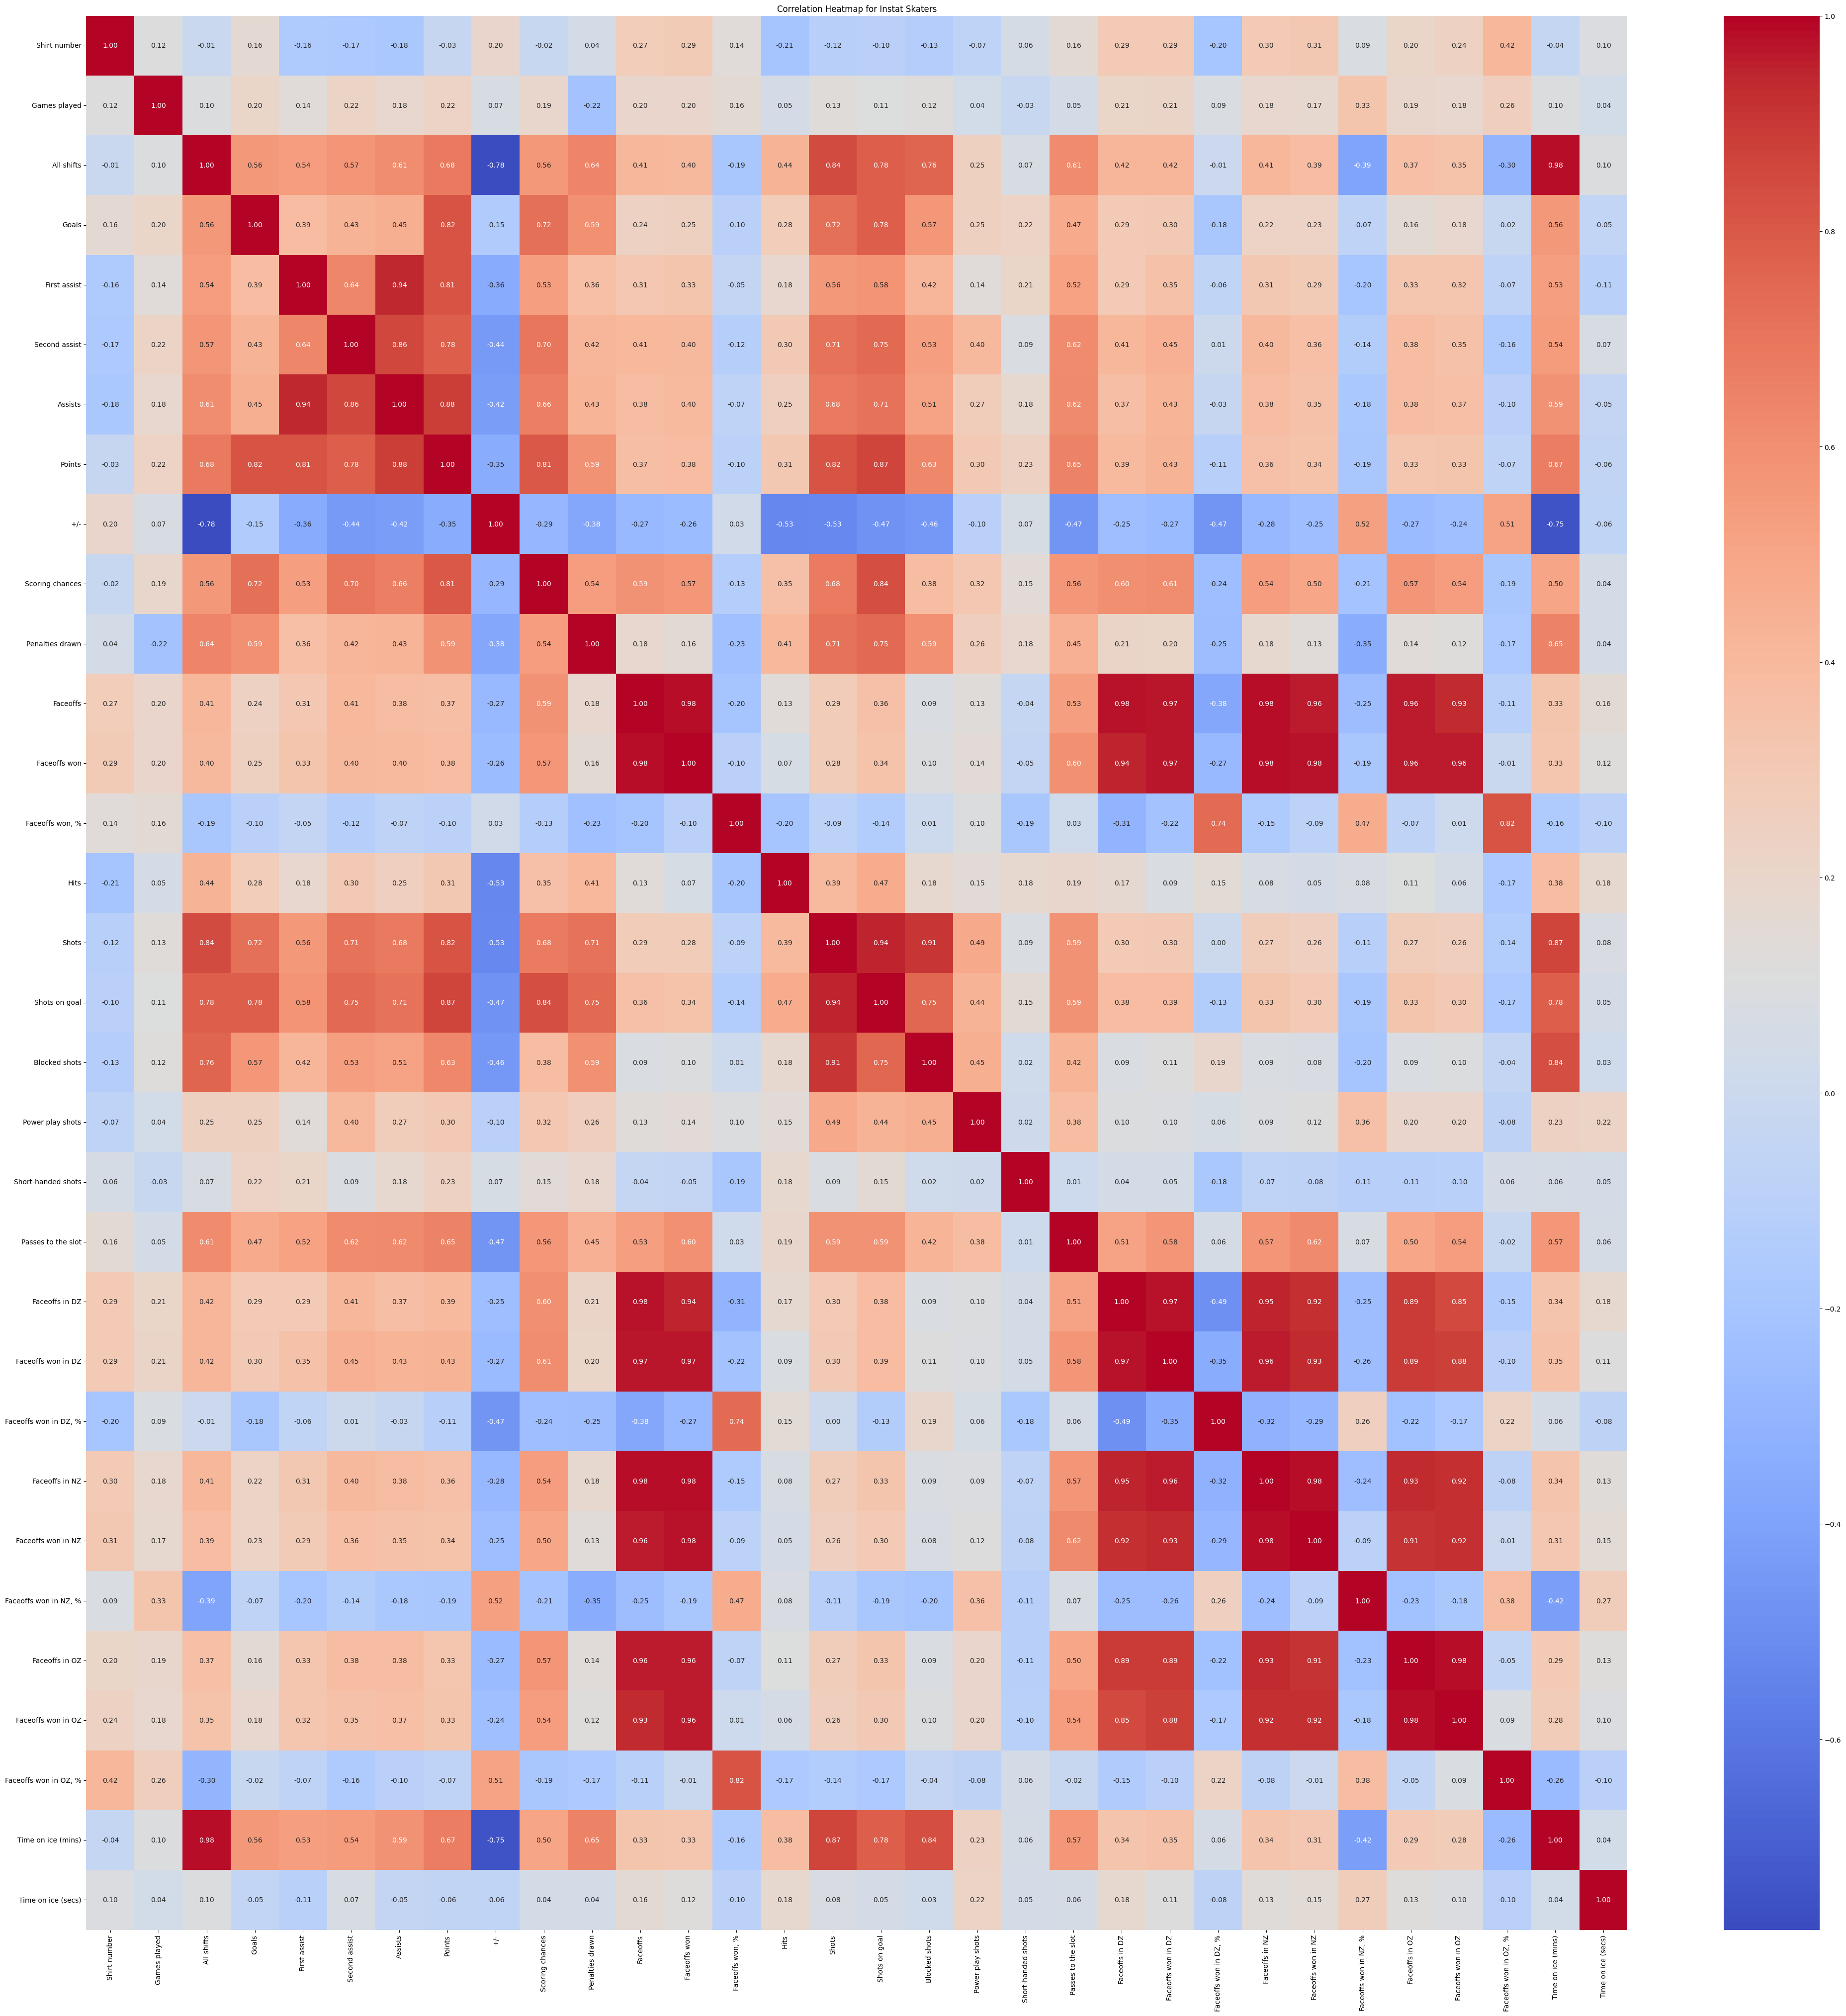

In [37]:
# Select numerical columns for the heatmap
numerical_columns = instat_skaters.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = instat_skaters[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Instat Skaters')
plt.show()

In [38]:
display(instat_skaters)

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,"Faceoffs won in DZ, %",Faceoffs in NZ,Faceoffs won in NZ,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Type,Time on ice (mins),Time on ice (secs)
0,6,Alyssa Wilson,F,18:39,18,22.00,0.00,0.00,0.06,0.06,...,100.0,0.06,0.00,NaN,0.00,0.00,NaN,GamesTotal,18,39
1,12,Ella Bynan,F,17:01,18,20.00,0.00,0.17,0.11,0.28,...,48.0,2.90,1.17,40.0,4.20,2.20,51.0,GamesTotal,17,1
2,88,Reece Gall,F,14:29,18,17.00,0.17,0.00,0.00,0.00,...,34.0,1.50,0.56,37.0,1.00,0.61,61.0,GamesTotal,14,29
3,42,Averi Reider,F,08:19,17,10.00,0.00,0.06,0.00,0.06,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,GamesTotal,8,19
4,91,Olivia Sharkoski,F,12:05,18,17.00,0.11,0.00,0.00,0.00,...,38.0,0.78,0.28,36.0,0.89,0.39,44.0,GamesTotal,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,Kayla MacKinnon,D,03:18,18,3.60,0.00,0.00,0.00,0.00,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,PK,3,18
76,47,Kaytlen Kratzer,D,03:36,14,3.30,0.00,0.00,0.00,0.00,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,PK,3,36
77,26,Julia Marano,D,01:19,17,1.76,0.00,0.00,0.00,0.00,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,PK,1,19
78,16,Lillian Scardicchio,D,00:00,18,0.06,0.00,0.00,0.00,0.00,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,PK,0,0


In [39]:
# List all distinct playerId in drive dataframe
distinct_player_ids = drive['playerId'].unique()
print("Distinct playerIds in drive dataframe:", distinct_player_ids)

# List all distinct Shirt number in instat_skaters dataframe
distinct_shirt_numbers = instat_skaters['Shirt number'].unique()
print("Distinct Shirt numbers in instat_skaters dataframe:", distinct_shirt_numbers)

Distinct playerIds in drive dataframe: ['h26' 'h35' 'h77' 'h10' 'h15' 'h8' 'h21' 'h42' 'h91' 'h88' 'h11' 'h22'
 'h13' 'h19' 'h5' 'h6' 'h16' 'h47' 'h48' 'h4' 'h9']
Distinct Shirt numbers in instat_skaters dataframe: [ 6 12 88 42 91  8 13  5 77 10 21 18 17 11 15  4 47 26 16 19]


In [40]:
# Convert playerId in drive to shirt numbers
drive_shirt_numbers = drive['playerId'].apply(lambda x: int(x[1:]) if x[1:].isdigit() else None)

# Find missing shirt numbers
missing_shirt_numbers = set(instat_skaters['Shirt number']) - set(drive_shirt_numbers.dropna())
print("Missing shirt numbers from drive that are in skaters:", missing_shirt_numbers)

Missing shirt numbers from drive that are in skaters: {17, 18, 12}


In [41]:
# Find additional playerIds in drive that are not in instat_skaters
additional_player_ids = set(drive['playerId']) - set(drive_shirt_numbers.dropna())
print("Additional playerIds in drive that are not in skaters:", additional_player_ids)

Additional playerIds in drive that are not in skaters: {'h11', 'h10', 'h16', 'h8', 'h91', 'h13', 'h9', 'h6', 'h15', 'h47', 'h21', 'h22', 'h19', 'h88', 'h4', 'h26', 'h35', 'h77', 'h48', 'h42', 'h5'}


In [42]:
# Remove 'h' prefix from playerId in drive dataframe
drive['playerId_no_h'] = drive['playerId'].apply(lambda x: int(x[1:]) if x[1:].isdigit() else None)

# Perform left join
merged_df = pd.merge(instat_skaters, drive, left_on='Shirt number', right_on='playerId_no_h', how='left')

# Display the merged dataframe
display(merged_df.head())

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,skatingEdge,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,playerId_no_h
0,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,left,1.006,False,True,0.280549,1.0,entered,0.0,0.1,6.0
1,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,linear,1.009,False,True,0.280549,1.0,entered,0.0,0.2,6.0
2,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,linear,1.013,False,True,0.280549,1.0,entered,0.0,0.3,6.0
3,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,linear,1.016,False,True,0.280549,1.0,entered,0.0,0.4,6.0
4,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,linear,1.020,False,True,0.280549,1.0,entered,0.0,0.5,6.0


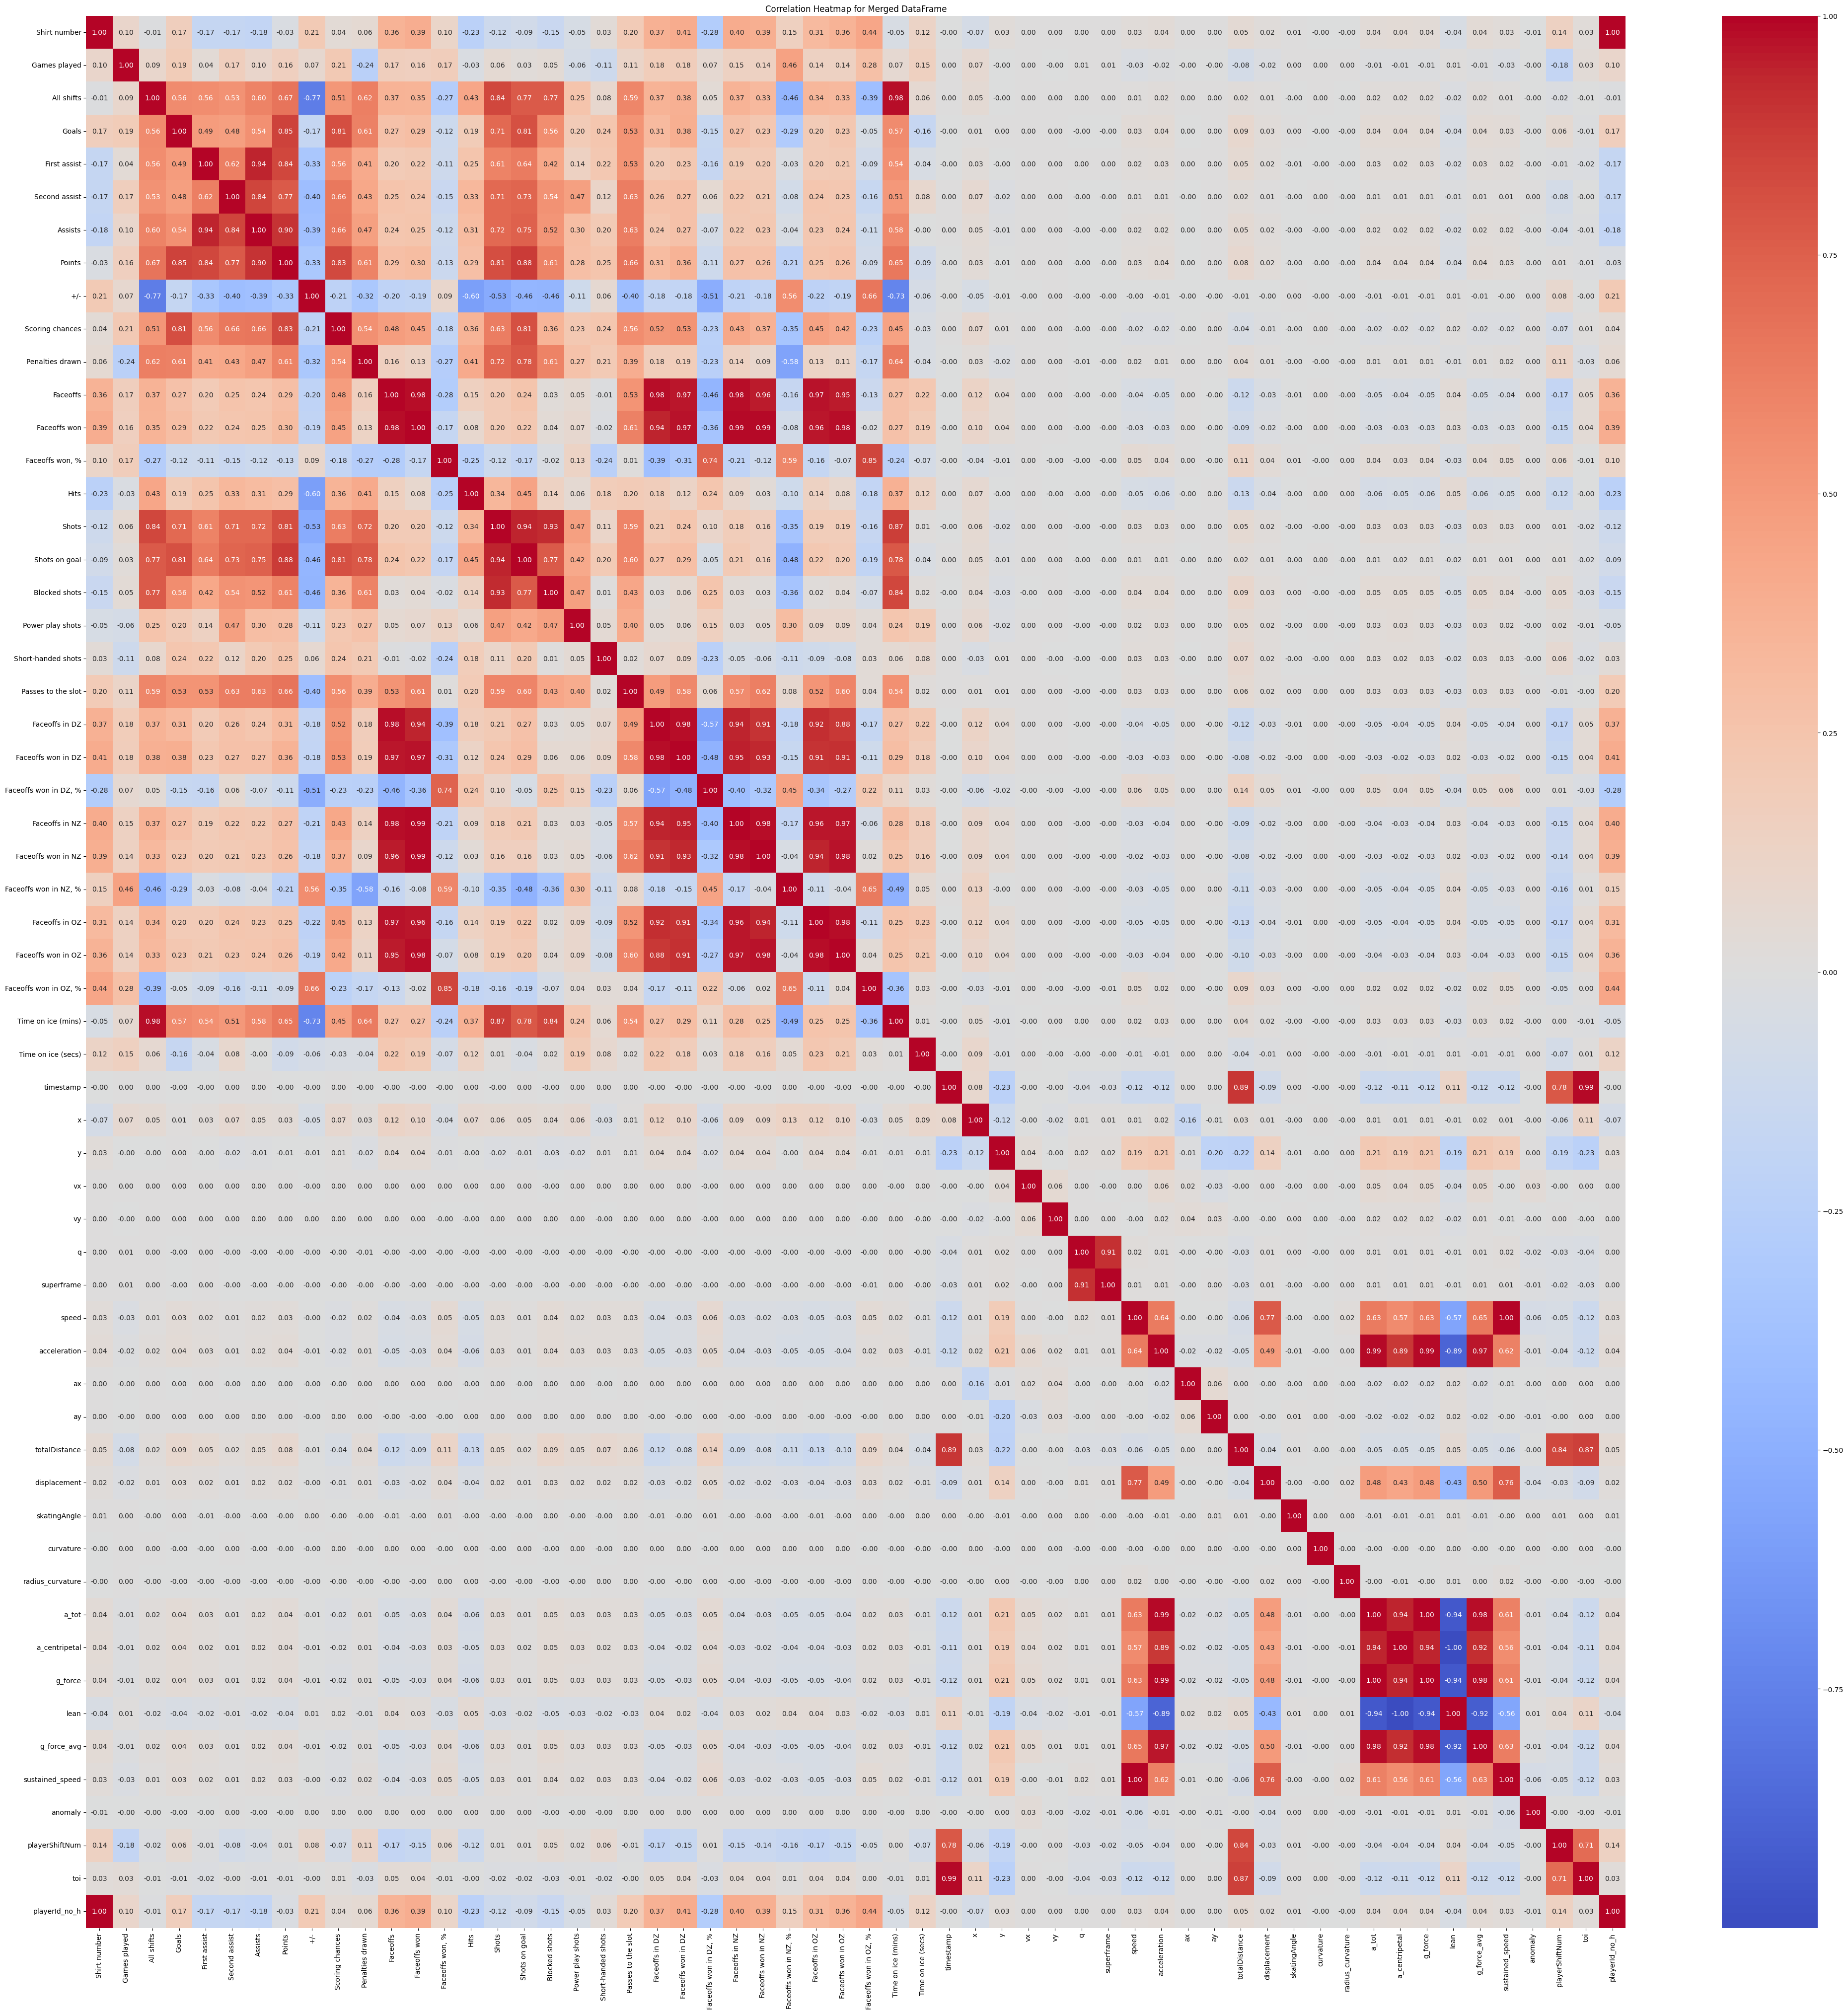

In [45]:
# Select numerical columns for the heatmap
numerical_columns_merged = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix_merged = merged_df[numerical_columns_merged].corr()

# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix_merged, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Merged DataFrame')
plt.show()